In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os

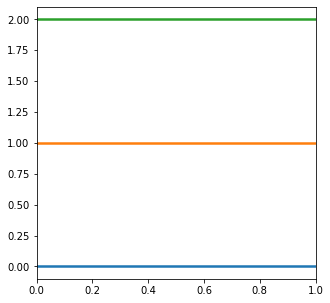

In [5]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#new_cmap = ['#1F78B4','#FB9A99','#E31A1C']
new_cmap = ['tab:blue','tab:orange','tab:green']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors = rtg_r(np.linspace(0,1,3))

#Test colormap
fig = plt.figure(figsize=(5,5))

for i,color in enumerate(colors):
    plt.axhline(i, color=colors[i], linewidth=2.5)

In [6]:
proteins = ['FUS', 'aSyn', 'htau40', 'p15PAF']
#lambdas = ['1.00', '1.10', '1.12']
rescaling_approach = ['OG', 'PW', 'PP']
lambdas_approach = {'OG':'1.00', 'PW':'1.10', 'PP':'0.88'}

Kd_exp = [4.9, 1.5]
protein_names = {'FUS':'FUS$_{LCD}$', 'aSyn':'αSyn', 'htau40':'hTau40', 'p15PAF':'p15PAF'}

replicas = 10

#Bound threshold
thresh = 0.8

PW_dir = '/storage1/thomasen/MARTINI_rescaling/MARTINI_PWrescaling/protein_protein/Production_run'

# Binding/unbinding with mindist between all beads

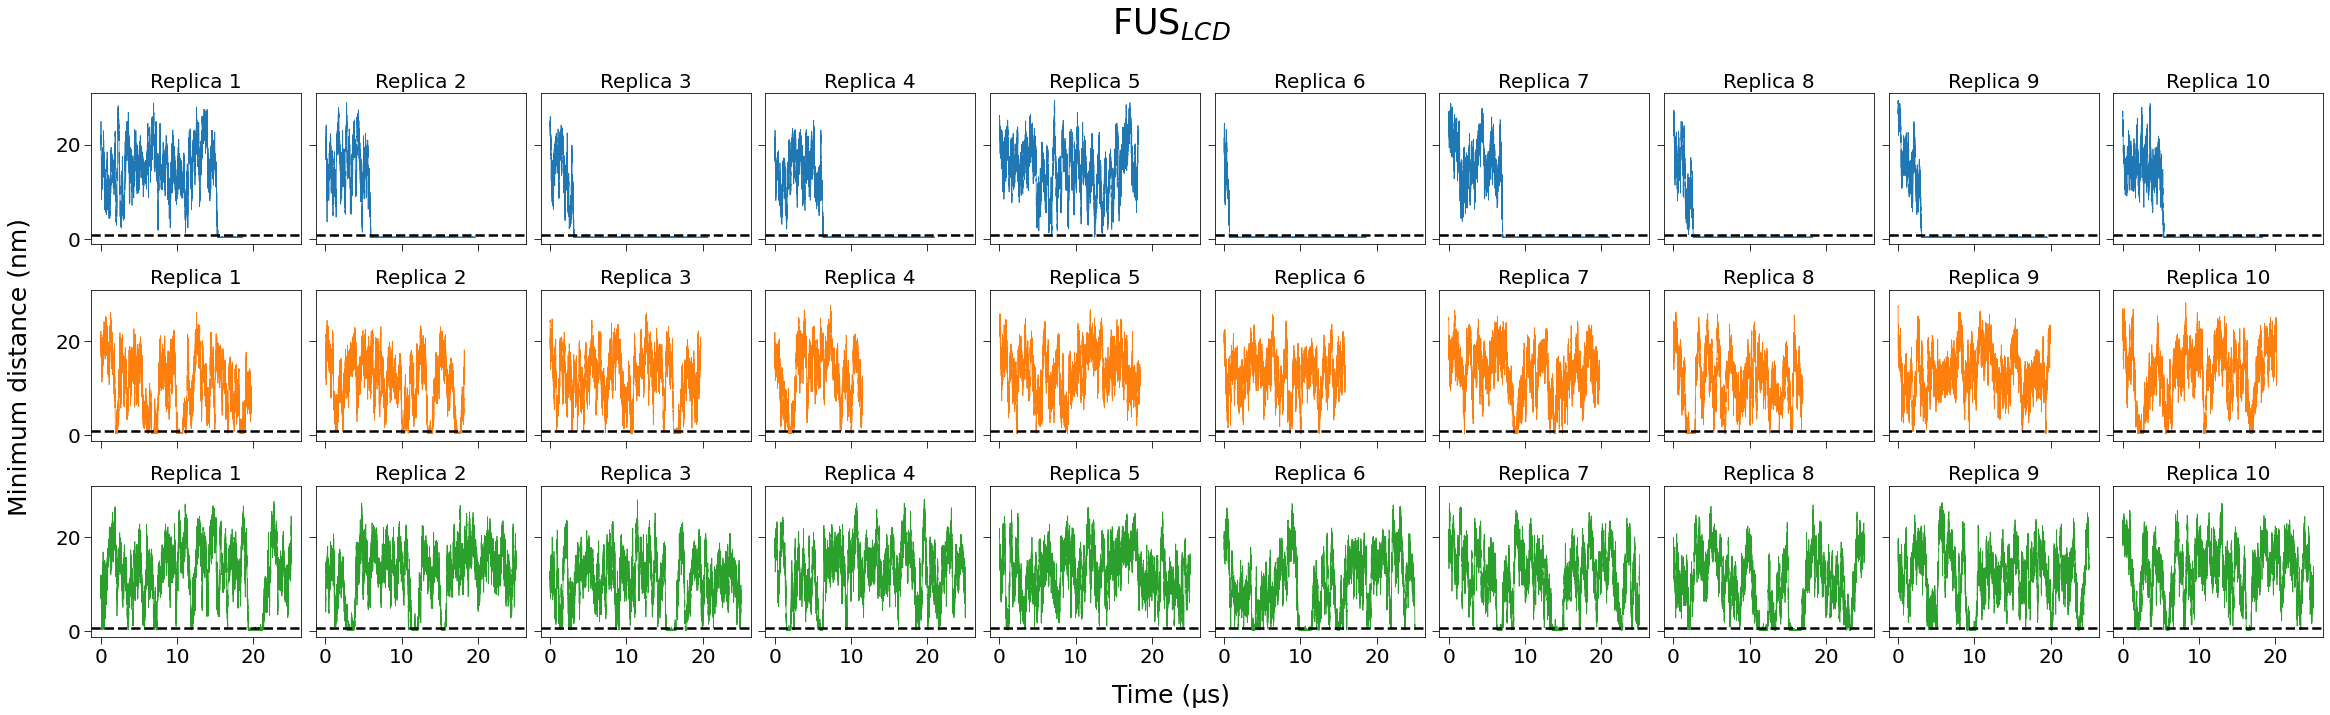

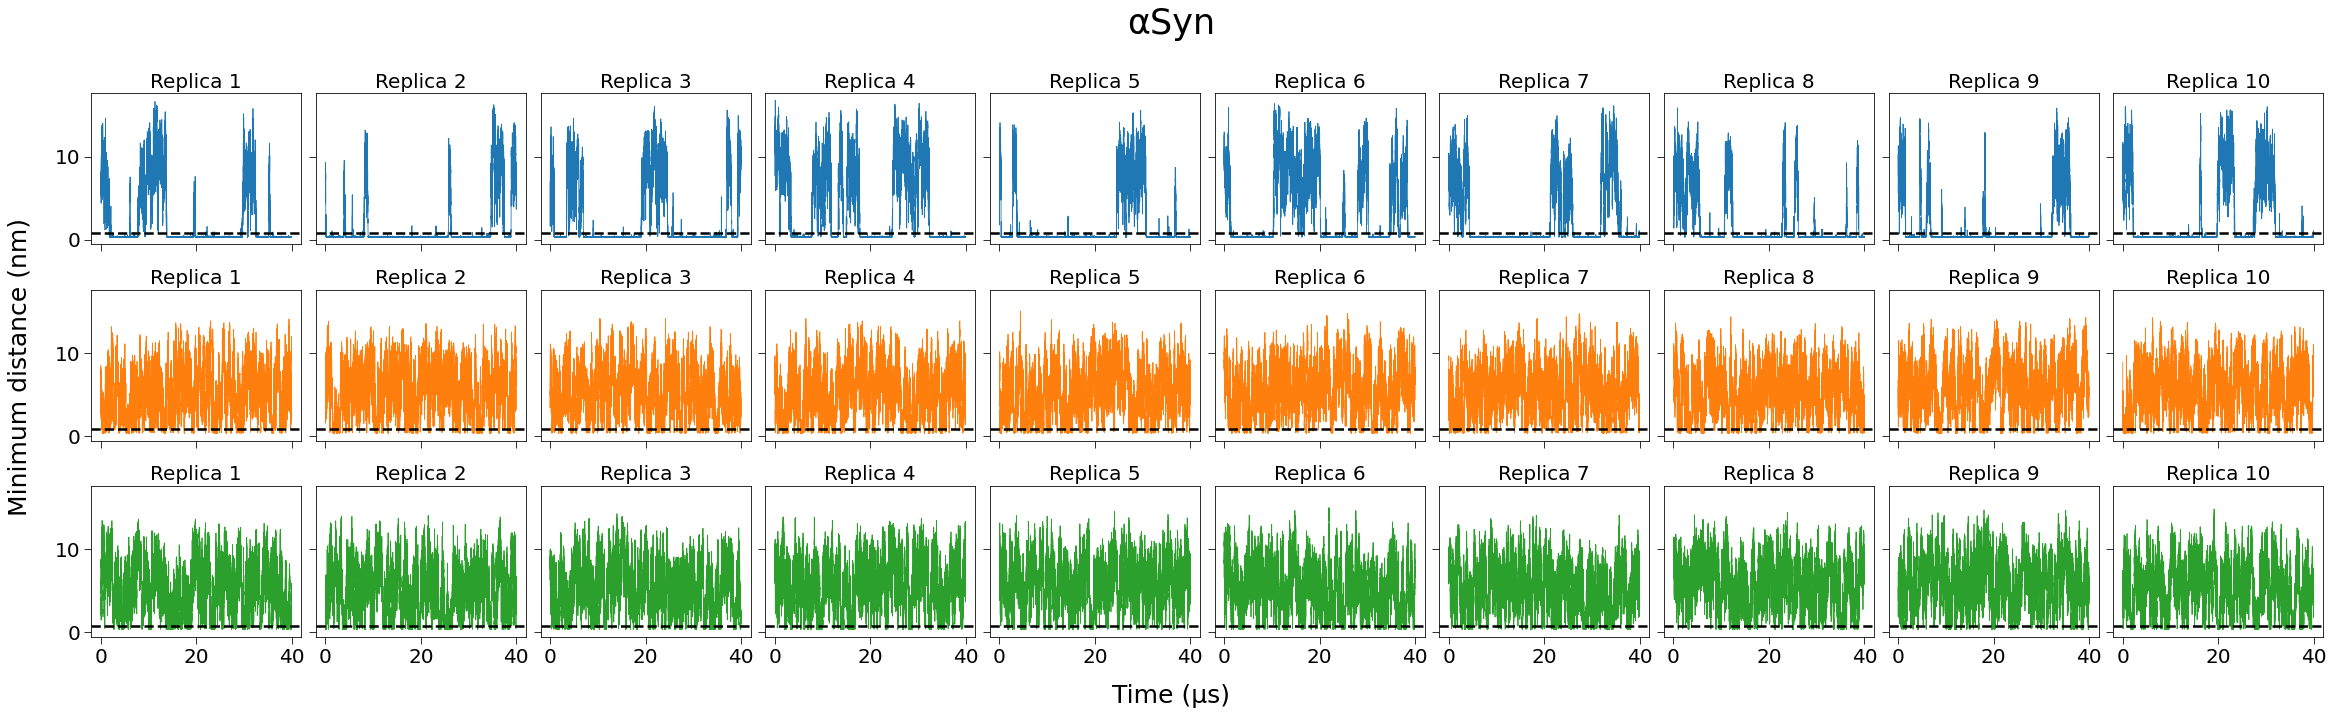

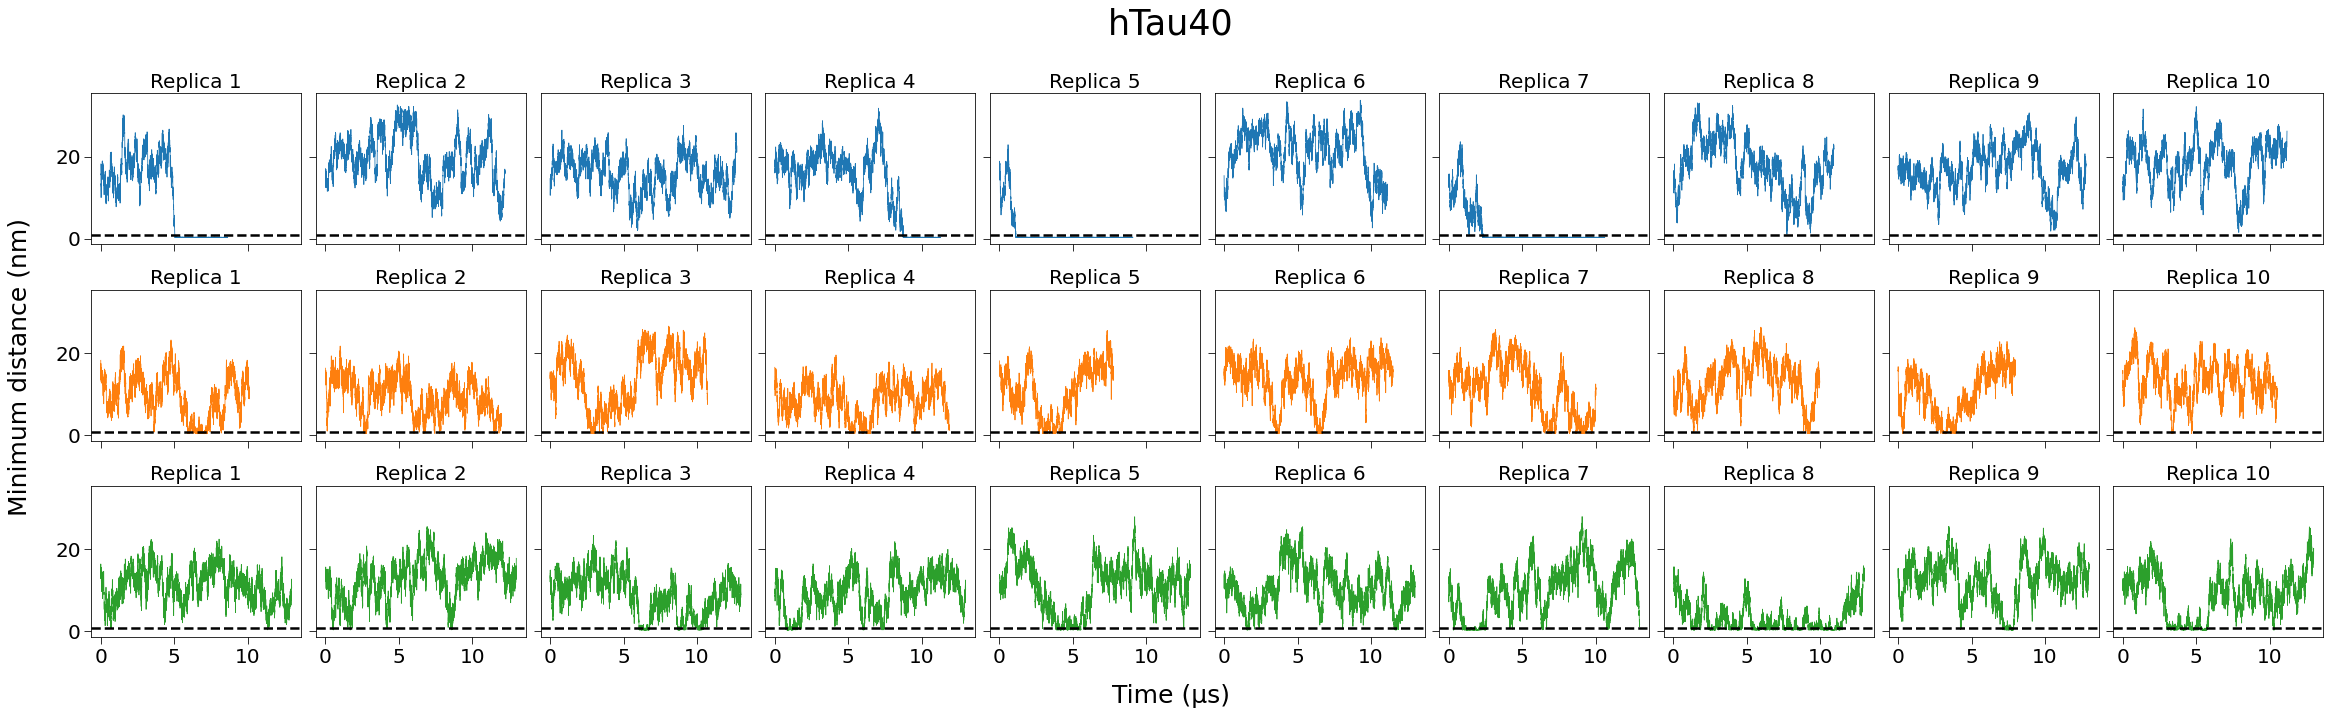

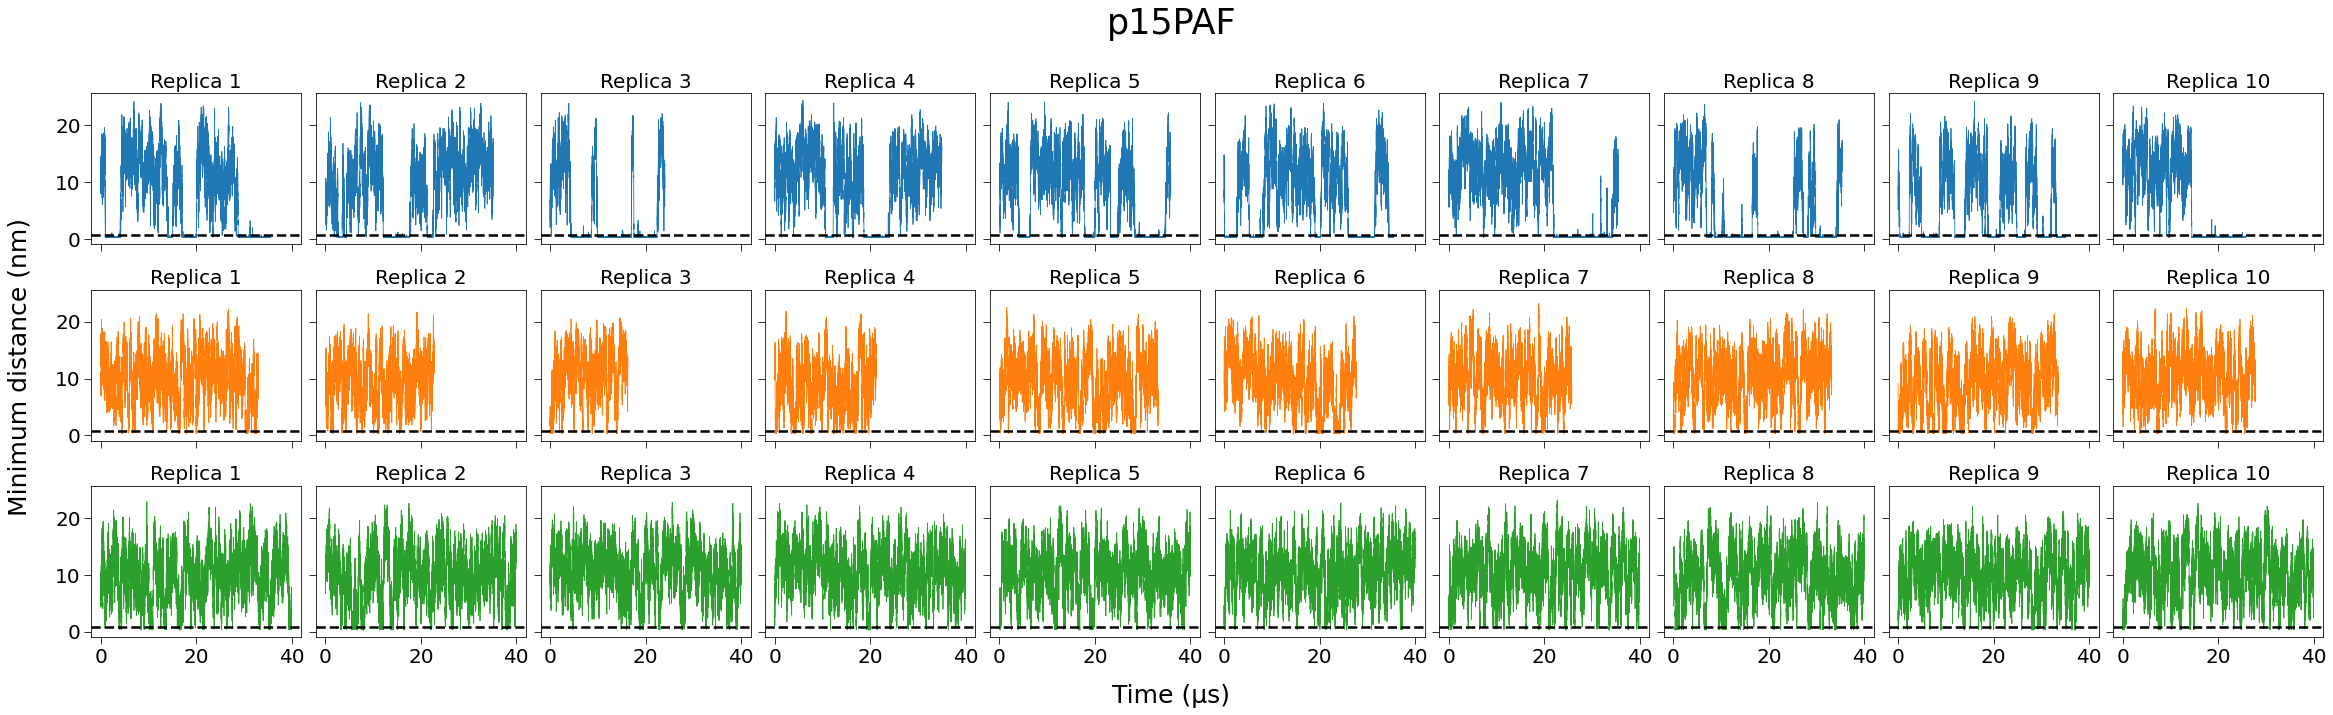

In [31]:
fraction_bound_vs_replica_vs_lambda_vs_protein = []
fraction_bound_vs_lambda_vs_protein = []
fraction_bound_err_vs_lambda_vs_protein = []

for protein in proteins:
    #Analyze fraction bound and unbound with single cut-off
    fraction_bound_vs_replica_vs_lambda = []
    fraction_bound_vs_lambda = []
    fraction_bound_err_vs_lambda = []
    
    #Start plot
    fig, ax = plt.subplots(figsize=(40,10), nrows=3, ncols=10, sharex=True, sharey=True)    
    plt.subplots_adjust(hspace = 0.3, wspace=0.07)
    
    fig.text(0.5, 1.00, protein_names[protein], ha='center', va='top', fontsize=35)
    fig.text(0.5, 0.06, 'Time (µs)', ha='center', va='top', fontsize=25)
    fig.text(0.1, 0.5, 'Minimum distance (nm)', ha='center', va='center', fontsize=25, rotation=90)
    
    #Loop over rescaling approaches
    for plot_y,approach in enumerate(rescaling_approach):
        l=lambdas_approach[approach]

        fraction_bound_vs_replica = []
        for replica in range(1,replicas+1):
                        
            #Load data
            if approach == 'PW' or approach == 'OG':
                time, mindist = np.genfromtxt(f'{PW_dir}/{protein}/two_{protein}_{replica}/lambda_{l}/data/{protein}1_{protein}2_mindist_lambda{l}.xvg', skip_header=24, usecols=(0,1), unpack=True)
            elif approach == 'PP':
                time, mindist = np.genfromtxt(f'data/{protein}1_{protein}2_mindist_rep{replica}.xvg', skip_header=24, usecols=(0,1), unpack=True)
            
            plot_x=replica-1
            
            ax[plot_y,plot_x].plot(time, mindist, '-', linewidth = 0.8, color=colors[plot_y])

            ax[plot_y,plot_x].axhline(thresh, linewidth=2.5, color='black', alpha=1, ls='--')

            ax[plot_y,plot_x].set_title(f'Replica {replica}', fontsize=20)

            ax[plot_y,plot_x].tick_params(colors='black', direction='out', length=7, labelsize=20)

            #plt.ylabel('Minimum distance (nm)', fontsize=20)
            #plt.xlabel('Time (µs)', fontsize=20)
              
            """
            #Fermi transform to check for two states
            L=1.5
            B=50

            mindist_fermi = 1/(1+np.exp(B*(mindist-L*thresh)))

            #Plot data fermi transformed for first 20us
            fig= plt.figure(figsize=(10,5))
            axes= fig.add_axes([1,1,1,1])

            plt.plot(time, mindist_fermi, '-', linewidth = 0.8)

            plt.title(f'{protein}, λ={l}, replica {replica}', fontsize=20)

            plt.tick_params(colors='black', direction='out', length=7, labelsize=20)

            plt.ylabel('Minimum distance normalized', fontsize=20)
            plt.xlabel('Time (µs)', fontsize=20)

            #fig.savefig(f"figures/{protein}/mindist_vs_time_fermiswitch_{approach}_replica{replica}.png", bbox_inches='tight', pad_inches=1, dpi=400)
            #fig.savefig(f"figures/{protein}/mindist_vs_time_fermiswitch_{approach}_replica{replica}.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
            """
            
            #Count number of bound
            frames_bound = np.count_nonzero(mindist < thresh)
            #Get fraction bound
            fraction_bound = frames_bound/len(mindist)
            #Append to list
            fraction_bound_vs_replica.append(fraction_bound)
        
        #Average over replicas
        fraction_bound_vs_replica_vs_lambda.append(fraction_bound_vs_replica)
        fraction_bound_avg = np.average(fraction_bound_vs_replica)
        fraction_bound_vs_lambda.append(fraction_bound_avg)

        #Get standard deviation over replicas
        fraction_bound_err = np.std(fraction_bound_vs_replica)/np.sqrt(np.size(fraction_bound_vs_replica))
        fraction_bound_err_vs_lambda.append(fraction_bound_err)

    fraction_bound_vs_replica_vs_lambda_vs_protein.append(fraction_bound_vs_replica_vs_lambda)
    fraction_bound_vs_lambda_vs_protein.append(fraction_bound_vs_lambda)
    fraction_bound_err_vs_lambda_vs_protein.append(fraction_bound_err_vs_lambda)
          
    fig.savefig(f"figures/mindist_vs_time_{protein}.png", bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig(f"figures/mindist_vs_time_{protein}.pdf", bbox_inches='tight', pad_inches=1, dpi=400)
                    

[0.4042916582517126, 0.026240997452970316, 0.0184870378240544]
[0.044447383156900624, 0.004168533106297884, 0.002397014463346451]
[0.4042916582517126, 0.026240997452970316, 0.0184870378240544]
[0.044447383156900624, 0.004168533106297884, 0.002397014463346451]
[0.4042916582517126, 0.026240997452970316, 0.0184870378240544]
[0.044447383156900624, 0.004168533106297884, 0.002397014463346451]
[0.4042916582517126, 0.026240997452970316, 0.0184870378240544]
[0.044447383156900624, 0.004168533106297884, 0.002397014463346451]


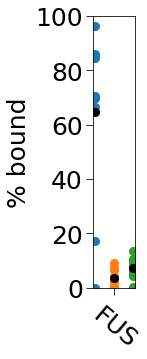

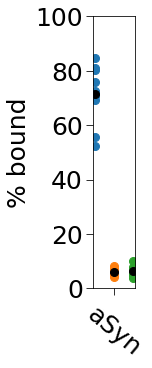

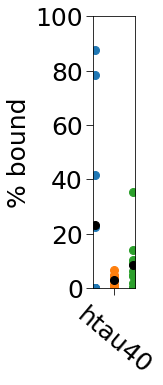

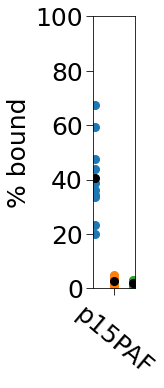

In [15]:
for i,protein in enumerate(proteins):
    
    #Plot data
    fig= plt.figure(figsize=(0.75,5))

    for j,l in enumerate(rescaling_approach):
        plt.plot([j]*replicas, np.array(fraction_bound_vs_replica_vs_lambda_vs_protein[i][j])*100, 'o', markersize=8, c=colors[j])
        plt.plot(j, np.array(fraction_bound_vs_lambda_vs_protein[i][j])*100, 'o', markersize=8, color='black')
    
    plt.ylim(0,100)
    
    plt.ylabel('% bound', fontsize=25)
    plt.xlabel(protein, fontsize=25, rotation=-40)
    
    plt.xticks([1], '')
        
    plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
    plt.tick_params(colors='black', axis='x', direction='out', rotation=-40, length=7, labelsize=25)
    
    xlim1 = plt.xlim()[0]
    xlim2 = plt.xlim()[1]

    plt.xlim(xlim1, xlim2)
    
    #fig.savefig(f"figures/{protein}/fractionbound_vs_lambda.png", bbox_inches='tight', pad_inches=1, dpi=400)
    #fig.savefig(f"figures/{protein}/fractionbound_vs_lambda.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

    print(fraction_bound_vs_lambda)
    print(fraction_bound_err_vs_lambda)

[0.4042916582517126, 0.026240997452970316, 0.0184870378240544]
[0.044447383156900624, 0.004168533106297884, 0.002397014463346451]
[0.4042916582517126, 0.026240997452970316, 0.0184870378240544]
[0.044447383156900624, 0.004168533106297884, 0.002397014463346451]
[0.4042916582517126, 0.026240997452970316, 0.0184870378240544]
[0.044447383156900624, 0.004168533106297884, 0.002397014463346451]
[0.4042916582517126, 0.026240997452970316, 0.0184870378240544]
[0.044447383156900624, 0.004168533106297884, 0.002397014463346451]


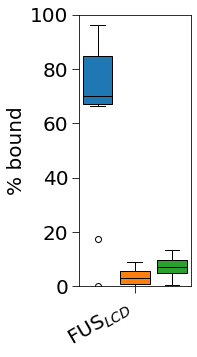

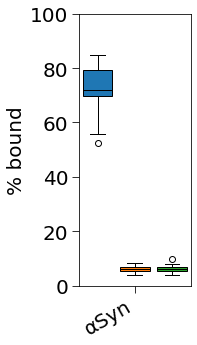

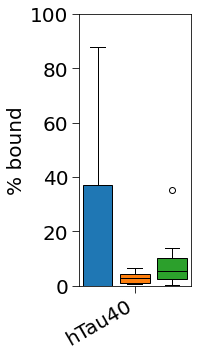

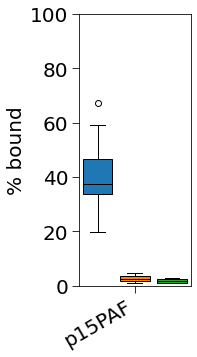

In [17]:
for i,protein in enumerate(proteins):
    
    #Plot data
    fig= plt.figure(figsize=(2,5))

    for j,l in enumerate(rescaling_approach):
        plt.boxplot(np.array(fraction_bound_vs_replica_vs_lambda_vs_protein[i][j])*100, vert=True, patch_artist=True, positions=[j], widths=[0.8],
            boxprops=dict(facecolor=colors[j], color='black'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(color='black', markeredgecolor='black'),
            medianprops=dict(color='black'),
            )

    plt.ylim(0,100)
    
    plt.ylabel('% bound', fontsize=20)
        
    plt.tick_params(colors='black', direction='out', length=7, labelsize=20)
    plt.xticks([1], labels=[protein_names[protein]], rotation=30, fontsize=20, ha='right')

    xlim1 = plt.xlim()[0]
    xlim2 = plt.xlim()[1]

    plt.xlim(xlim1, xlim2)
    
    fig.savefig(f"figures/{protein}/fractionbound_vs_lambda.png", bbox_inches='tight', pad_inches=1, dpi=400)
    fig.savefig(f"figures/{protein}/fractionbound_vs_lambda.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

    print(fraction_bound_vs_lambda)
    print(fraction_bound_err_vs_lambda)